In [ ]:
%%writefile requirements.txt
tensorflow==2.17.0
keras==3.4.1

Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 636.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
 

In [ ]:
import numpy as np
import os

import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
from keras.layers import Input, Dense, Dropout, Lambda
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl

print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")

Tensorflow version -> 2.17.0
Keras version -> 3.4.1


In [ ]:
pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 40.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/[2024-2025] AN2DL HOMEWORK 1/Definitive_work

Mounted at /gdrive
/gdrive/MyDrive/[2024-2025] AN2DL HOMEWORK 1/Definitive_work


In [ ]:
# Fix randomness and hide warnings
SEED = 42  # Random seed for reproducibility

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import TensorFlow and Keras
import tensorflow as tf
import tensorflow.keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras_cv

# Importing specific TensorFlow Keras layers
from tensorflow.keras.layers import (
    Input, Concatenate, Dense, GlobalAveragePooling2D, Dropout,
    RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness
)

# Set seed for TensorFlow
tf.random.set_seed(SEED)
tf.compat.v1.set_random_seed(SEED)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec
from datetime import datetime

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


# Data Augmentation

The two employed advanced augmentations are mixup and rand augment.

In [ ]:
# Load already preprocessed dataset
data = np.load('preprocessed_dataset.npz')
X_train = data['X_train']
X_test = data['X_test']
X_val = data['X_val']
y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']

In [ ]:
def mixup(X, y, alpha=1.0):
    """
    Apply MixUp augmentation to a batch of images and labels.

    Parameters:
    - X: numpy array of shape (batch_size, height, width, channels), training images.
    - y: numpy array of shape (batch_size, num_classes), one-hot encoded labels.
    - alpha: float, parameter for the beta distribution.

    Returns:
    - X_mixup: numpy array, augmented images.
    - y_mixup: numpy array, mixed labels.
    """
    batch_size = X.shape[0]

    # Generate lambda from a Beta distribution
    lam = np.random.beta(alpha, alpha)

    # Randomly shuffle the indices
    rand_index = np.random.permutation(batch_size)

    # Perform the MixUp
    X_mixup = lam * X + (1 - lam) * X[rand_index, :]
    y_mixup = lam * y + (1 - lam) * y[rand_index, :]

    return X_mixup, y_mixup

# Define the RandAugment layer
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),  # Assuming images are in the range [0, 255]
    augmentations_per_image=3,  #set this to one of you got ram issues
    magnitude=0.3,
    magnitude_stddev=0.2,
    rate=1.0,
)

# Function to apply RandAugment
def apply_rand_augment(images, labels):
    augmented_images = rand_augment(images)
    return augmented_images, labels

# Convert NumPy dataset to TensorFlow Dataset
AUTOTUNE = tf.data.AUTOTUNE

# Assuming X_train is of shape (num_samples, height, width, channels) and y_train is labels
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)

# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf))

# Apply RandAugment and optimize dataset
Rand_augmented_dataset = (
    train_dataset
    .map(apply_rand_augment, num_parallel_calls=AUTOTUNE)
    .batch(32)
    .prefetch(AUTOTUNE)
)

In [ ]:
# Convert tf.data.Dataset to NumPy arrays
def dataset_to_numpy(dataset):
    X_list = []
    y_list = []

    for images, labels in dataset:
        X_list.append(images.numpy())
        y_list.append(labels.numpy())

    # Combine all batches into single NumPy arrays
    X_train = np.concatenate(X_list, axis=0)
    y_train = np.concatenate(y_list, axis=0)

    return X_train, y_train

# Assuming train_dataset is batched
X_rand, y_rand = dataset_to_numpy(Rand_augmented_dataset)
X_mix, y_mix = mixup(X_train, y_train)
X_train = np.concatenate((X_train, X_rand, X_mix), axis=0)
y_train = np.concatenate((y_train, y_rand, y_mix), axis=0)

# Ensure y_train has the correct shape
y_train = y_train.reshape(-1, 8)

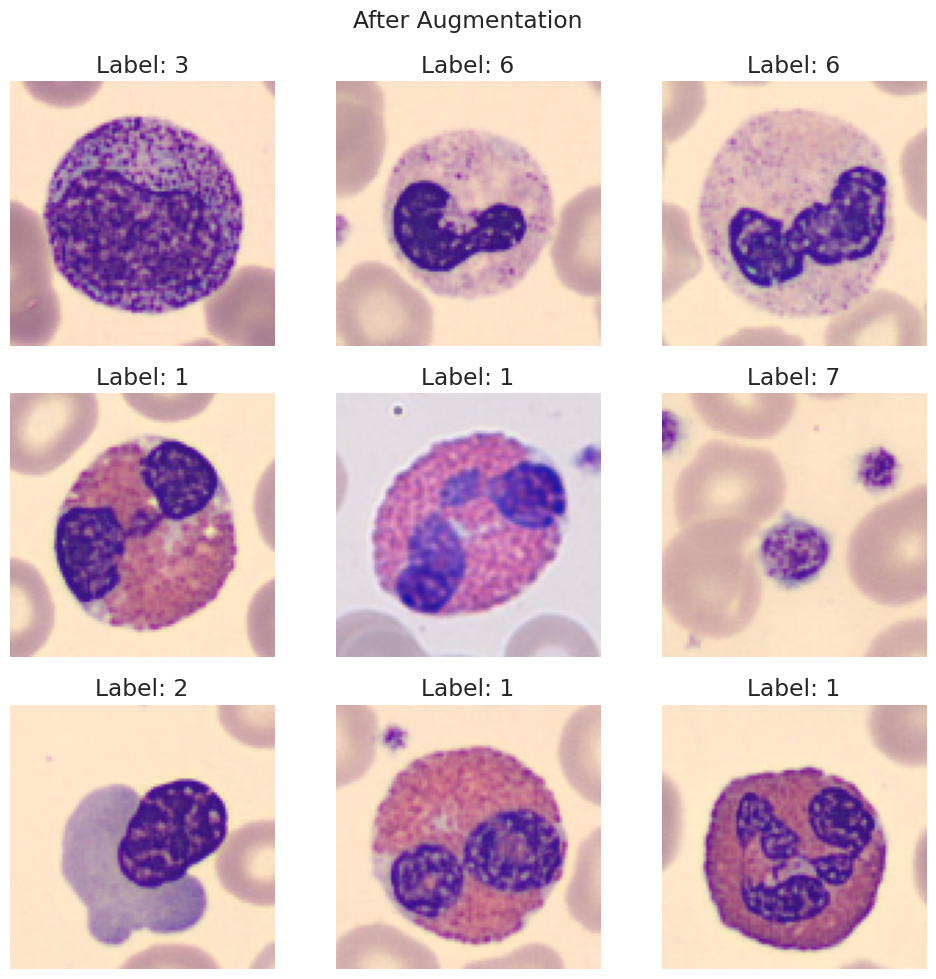

<Figure size 640x480 with 0 Axes>

In [ ]:
def visualize_dataset(dataset, title):
    # dataset is assumed to be a tuple (images, labels)
    images, labels = dataset  # Directly unpack the tuple

    # If labels are not one-hot encoded, no need to convert
    # Check if labels have more than one dimension (indicating one-hot encoding)
    if labels.ndim > 1:
        labels = tf.argmax(labels, axis=1)

    images = images / 255.0  # Scale to [0, 255]

    # Create a figure with subplots
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle(title)

    # Plot images
    for i in range(min(9, len(images))):
        axs[i // 3, i % 3].imshow(images[i])
        axs[i // 3, i % 3].axis('off')
        axs[i // 3, i % 3].set_title(f'Label: {labels[i]}')

    plt.tight_layout()
    plt.show()
    plt.savefig("After Augmentation.png")

# Visualize the augmented dataset
visualize_dataset((X_train, y_train), title="After Augmentation")

# Fine-Tuning Hyperparameter Search

An EfficientNetV2M with a single dense layer with 128 neurons is the base for hyperparameter search. Three approaches in fine-tuning are considered, focusing on ratio of unfrozen layers and learning rate:
- Moderate
- Aggressive
- Conservative

## Base V2M + 128 Transfer Learning

In [ ]:
def unfreeze(model, fine_tuning_lr, base_idx=1, unfreeze_ratio=0.3):
    """
    Unfreeze a portion of layers in the base model (second layer of the full model)
    while excluding BatchNormalization layers. Prints the number of unfrozen layers
    and total layers in the base model.

    Args:
        model: The entire transfer learning model (with classification head).
        unfreeze_ratio: Proportion of layers to unfreeze in the base model (default is 30%).

    Returns:
        Modified model with the base model layers updated.
    """
    # Extract the base model (assumed to be the second layer in the full model)
    base_model = model.layers[base_idx]

    # Unfreeze the base model
    base_model.trainable = True

    # Freeze all layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Determine layers to unfreeze
    total_layers = len(base_model.layers)
    unfreeze_start = int(total_layers * (1 - unfreeze_ratio))
    unfrozen_layers_count = 0

    for i, layer in enumerate(base_model.layers):
        if i >= unfreeze_start:
            # Exclude BatchNormalization layers from being trainable
            if not isinstance(layer, tf.keras.layers.BatchNormalization):
                layer.trainable = True
                unfrozen_layers_count += 1

    # Print the count of unfrozen layers
    print(f"{unfrozen_layers_count}/{total_layers} layers unfrozen.")

    model.compile(
        optimizer=tf.keras.optimizers.Adam(fine_tuning_lr),
        loss='categorical_crossentropy',
        metrics=[tfk.metrics.F1Score(average='macro')]
    )

    return model

def plot_history(history_tl, history_ft, model_name):
    # Create figures and axes
    fig, axs = plt.subplots(2, figsize=(8, 10))

    # Extract relevant metrics
    tl_loss = history_tl['loss']
    tl_val_loss = history_tl['val_loss']
    tl_f1 = history_tl['f1_score']
    tl_val_f1 = history_tl['val_f1_score']

    ft_loss = history_ft['loss']
    ft_val_loss = history_ft['val_loss']
    ft_f1 = history_ft['f1_score']
    ft_val_f1 = history_ft['val_f1_score']

    # Concatenate transfer learning and fine-tuning histories
    loss = tl_loss + ft_loss
    val_loss = tl_val_loss + ft_val_loss
    f1 = tl_f1 + ft_f1
    val_f1 = tl_val_f1 + ft_val_f1

    # Calculate the epoch where fine-tuning starts
    ft_start = len(tl_loss)

    # Plot Categorical Crossentropy
    axs[0].plot(loss, linestyle=':', label='Training')
    axs[0].plot(val_loss, label='Validation')
    axs[0].axvline(x=ft_start-0.5, color='r', linestyle='--', label='Start of Fine-tuning')
    axs[0].set_title(f'Categorical Crossentropy - {model_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(loc='best')

    # Plot F1 Score
    axs[1].plot(f1, linestyle=':', label='Training')
    axs[1].plot(val_f1, label='Validation')
    axs[1].axvline(x=ft_start-0.5, color='r', linestyle='--', label='Start of Fine-tuning')
    axs[1].set_title(f'F1 Score - {model_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('F1 Score')
    axs[1].legend(loc='best')

    # Add text annotations
    axs[0].text(ft_start/2, axs[0].get_ylim()[1], 'Transfer Learning',
                horizontalalignment='center', verticalalignment='bottom')
    axs[0].text((len(loss) + ft_start)/2, axs[0].get_ylim()[1], 'Fine-tuning',
                horizontalalignment='center', verticalalignment='bottom')

    axs[1].text(ft_start/2, axs[1].get_ylim()[1], 'Transfer Learning',
                horizontalalignment='center', verticalalignment='bottom')
    axs[1].text((len(f1) + ft_start)/2, axs[1].get_ylim()[1], 'Fine-tuning',
                horizontalalignment='center', verticalalignment='bottom')

    # Layout so plots do not overlap
    fig.tight_layout()

    # Show plot
    plt.show()

import matplotlib.pyplot as plt

def plot_history_single(history, model_name):
    # Create figures and axes
    fig, axs = plt.subplots(2, figsize=(8, 10))

    # Extract relevant metrics
    loss = history['loss']
    val_loss = history['val_loss']
    f1 = history['f1_score']
    val_f1 = history['val_f1_score']

    # Plot Categorical Crossentropy
    axs[0].plot(loss, linestyle=':', label='Training')
    axs[0].plot(val_loss, label='Validation')
    axs[0].set_title(f'Categorical Crossentropy - {model_name}')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(loc='best')

    # Plot F1 Score
    axs[1].plot(f1, linestyle=':', label='Training')
    axs[1].plot(val_f1, label='Validation')
    axs[1].set_title(f'F1 Score - {model_name}')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('F1 Score')
    axs[1].legend(loc='best')

    # Layout so plots do not overlap
    fig.tight_layout()

    # Show plot
    plt.show()

def predict_and_score(model):
    # Make predictions for the model on the test set
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    # Calculate and display test set accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')
    test_precision = precision_score(y_test, y_pred, average='weighted')
    print(f'Precision score over the test set: {round(test_precision, 4)}')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    print(f'Recall score over the test set: {round(test_recall, 4)}')
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'F1 score over the test set: {round(test_f1, 4)}')

    # Compute confusion matrices for both models
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.tight_layout()
    plt.show()

In [ ]:
# Convert one-hot encoded labels to integer labels
if y_train.ndim > 1:
    y_int_train = np.argmax(y_train, axis=1)  # Flatten the one-hot labels to class indices
else:
    y_int_train = y_train  # Already in integer format

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_int_train), y=y_int_train)
class_weights = dict(enumerate(class_weights))

# Convert labels to one-hot encoding
y_test = to_categorical(y_test)

In [ ]:
# Parameters
INPUT_SHAPE = X_train.shape[1:]
OUTPUT_SHAPE = y_train.shape[1]
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
EPOCHS = 20

# Early Stopping and Learning Rate Reduction callbacks
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduction = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    min_lr=1e-6,
    factor=0.2,
    verbose=1
)

callbacks = [early_stopping, lr_reduction]

In [ ]:
from tensorflow.keras.applications import EfficientNetV2M

tf.keras.backend.clear_session()

# Define base model
base_model = EfficientNetV2M(
    weights='imagenet',
    include_top=False,
    input_shape=INPUT_SHAPE,
    pooling="avg",
    include_preprocessing=True
)

# Freeze the base model initially
base_model.trainable = False

# Define inputs
inputs = tfkl.Input(shape=INPUT_SHAPE)

# Pass through the base model
x = base_model(inputs)

# Add classifier head
x = tfkl.Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = tfkl.Dropout(0.3)(x)
outputs = tfkl.Dense(OUTPUT_SHAPE, activation='softmax')(x)

# Create the complete model
model = tfk.models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=[tfk.metrics.F1Score(average='macro')]
)

# Print the model summary
model.summary(expand_nested=True)

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer (InputLayer)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling (Rescaling)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_conv (Conv2D)              │ (None, 48, 48, 24)          │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_bn (BatchNormalization)    │ (None, 48, 48, 24)          │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_activation (Activation)    │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_drop (Dropout)          │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_activation      │ (None, 48, 48, 24)          │              

 Total params: 53,315,388 (203.38 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 53,150,388 (202.75 MB)

In [ ]:
# Transfer learning
history_tl_efficientnetv2m = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Transfer learning validation F1Score: {round(max(history_tl_efficientnetv2m['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = 'V2M_DENSE_BASE.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 224s 811ms/step - f1_score: 0.4630 - loss: 1.4958 - val_f1_score: 0.8485 - val_loss: 0.4674 - learning_rate: 0.0010
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 183s 758ms/step - f1_score: 0.6328 - loss: 1.0262 - val_f1_score: 0.8909 - val_loss: 0.3758 - learning_rate: 0.0010
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 186s 770ms/step - f1_score: 0.6546 - loss: 0.9641 - val_f1_score: 0.8957 - val_loss: 0.3470 - learning_rate: 0.0010
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 181s 752ms/step - f1_score: 0.6655 - loss: 0.9277 - val_f1_score: 0.8965 - val_loss: 0.3314 - learning_rate: 0.0010
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 181s 751ms/step - f1_score: 0.6705 - loss: 0.9136 - val_f1_score: 0.9175 - val_loss: 0.2978 - learning_rate: 0.0010
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 183s 759ms/step - f1_score: 0.6746 - loss: 0.8923 - val_f1_score: 0.9073 - val_loss: 0.3014 - learning_rate: 0.0010
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 182s 754ms/step - f1_sco

## Moderate 0.6 + 1e-4

In [ ]:
# HYPER-PARAMETERS FINE-TUNING
FINE_TUNE_EPOCHS = 5
UNFREEZE_RATIO = 0.6
FINE_TUNING_LEARNING_RATE = 1e-4

In [ ]:
# Load base to fine-tune
model = tfk.models.load_model('V2M_DENSE_BASE.keras')

# Print the model summary
model.summary(expand_nested=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer (InputLayer)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling (Rescaling)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_conv (Conv2D)              │ (None, 48, 48, 24)          │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_bn (BatchNormalization)    │ (None, 48, 48, 24)          │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_activation (Activation)    │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_drop (Dropout)          │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_activation      │ (None, 48, 48, 24)          │              

 Total params: 53,645,390 (204.64 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 53,150,388 (202.75 MB)

 Optimizer params: 330,002 (1.26 MB)

In [ ]:
# Unfreeze
model = unfreeze(model, fine_tuning_lr=FINE_TUNING_LEARNING_RATE, unfreeze_ratio=UNFREEZE_RATIO)

# Fine-tuning
history_ft_efficientnetv2m = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Fine-tuning validation F1Score: {round(max(history_ft_efficientnetv2m['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = f'V2M_DENSE_{UNFREEZE_RATIO}_{FINE_TUNE_EPOCHS}_{FINE_TUNING_LEARNING_RATE}.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

356/741 layers unfrozen.
Epoch 1/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - f1_score: 0.6813 - loss: 0.9868 - val_f1_score: 0.9731 - val_loss: 0.1390 - learning_rate: 1.0000e-04
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - f1_score: 0.7985 - loss: 0.5470 - val_f1_score: 0.9744 - val_loss: 0.1386 - learning_rate: 1.0000e-04
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - f1_score: 0.8176 - loss: 0.4646 - val_f1_score: 0.9673 - val_loss: 0.1388 - learning_rate: 1.0000e-04
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - f1_score: 0.8223 - loss: 0.4400 - val_f1_score: 0.9751 - val_loss: 0.1353 - learning_rate: 1.0000e-04
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - f1_score: 0.8319 - loss: 0.4014 - val_f1_score: 0.9806 - val_loss: 0.1368 - learning_rate: 1.0000e-04
Fine-tuning validation F1Score: 98.06%


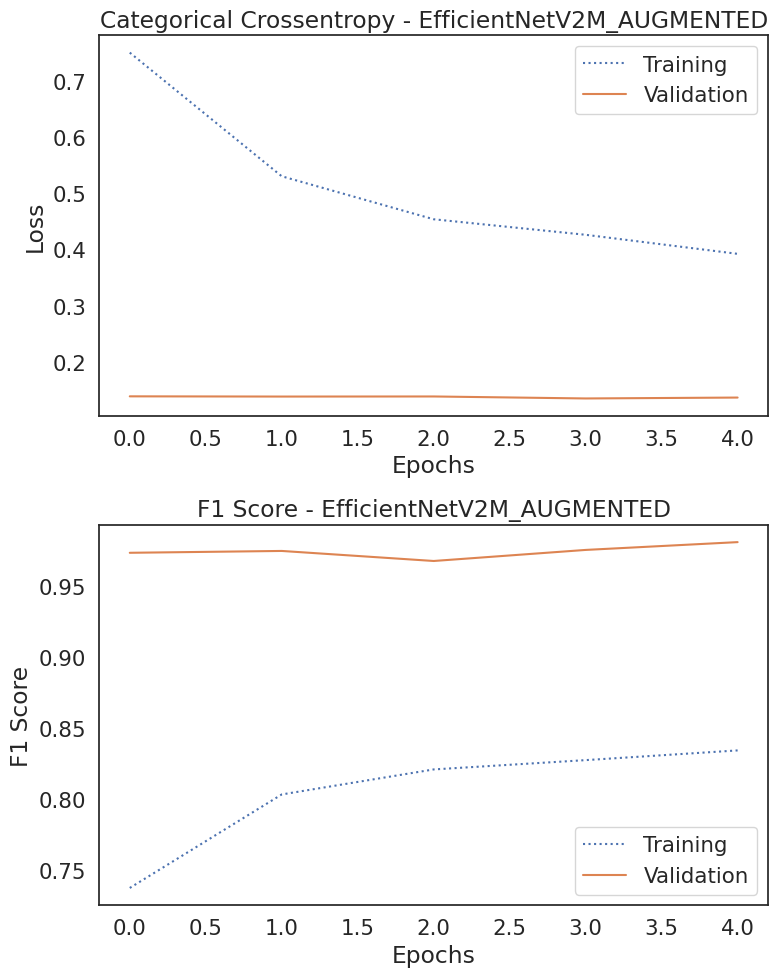

In [ ]:
# Plot loss fucntion and evaluation metric histories
plot_history_single(history_ft_efficientnetv2m, "EfficientNetV2M_AUGMENTED")

18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 669ms/step
Accuracy score over the test set: 0.9768
Precision score over the test set: 0.9774
Recall score over the test set: 0.9768
F1 score over the test set: 0.9769


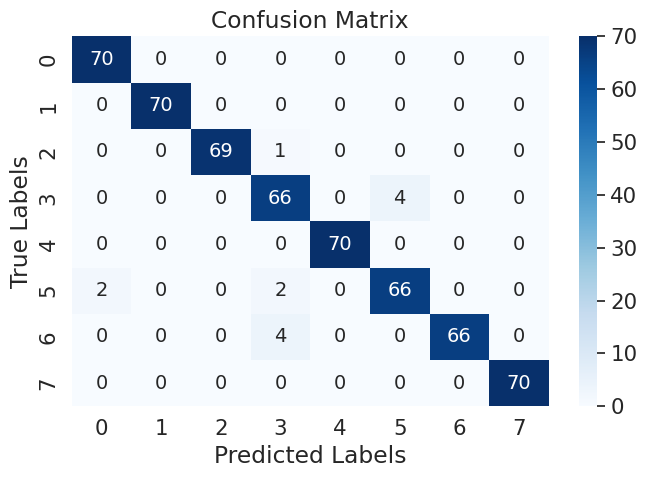

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_filename)
#Make predictions for model1 on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')
test_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')
test_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute confusion matrices for both models
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Optionally, you can delete the models to free up resources
del model

## Aggressive 0.8 + 5e-4

In [ ]:
# HYPER-PARAMETERS FINE-TUNING
FINE_TUNE_EPOCHS = 5
UNFREEZE_RATIO = 0.8
FINE_TUNING_LEARNING_RATE = 5e-4

In [ ]:
# Load base to fine-tune
model = tfk.models.load_model('V2M_DENSE_BASE.keras')

# Print the model summary
model.summary(expand_nested=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer (InputLayer)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling (Rescaling)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_conv (Conv2D)              │ (None, 48, 48, 24)          │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_bn (BatchNormalization)    │ (None, 48, 48, 24)          │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_activation (Activation)    │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_drop (Dropout)          │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_activation      │ (None, 48, 48, 24)          │              

 Total params: 53,645,390 (204.64 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 53,150,388 (202.75 MB)

 Optimizer params: 330,002 (1.26 MB)

In [ ]:
# Unfreeze
model = unfreeze(model, fine_tuning_lr=FINE_TUNING_LEARNING_RATE, unfreeze_ratio=UNFREEZE_RATIO)

# Fine-tuning
history_ft_efficientnetv2m = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Fine-tuning validation F1Score: {round(max(history_ft_efficientnetv2m['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = f'V2M_DENSE_{UNFREEZE_RATIO}_{FINE_TUNE_EPOCHS}_{FINE_TUNING_LEARNING_RATE}.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

474/741 layers unfrozen.
Epoch 1/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - f1_score: 0.4474 - loss: 2.8116 - val_f1_score: 0.9622 - val_loss: 0.1679 - learning_rate: 5.0000e-04
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 460s 2s/step - f1_score: 0.7950 - loss: 0.5612 - val_f1_score: 0.9795 - val_loss: 0.1186 - learning_rate: 5.0000e-04
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - f1_score: 0.8232 - loss: 0.4487 - val_f1_score: 0.9782 - val_loss: 0.1248 - learning_rate: 5.0000e-04
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - f1_score: 0.8295 - loss: 0.4022 - val_f1_score: 0.9557 - val_loss: 0.2530 - learning_rate: 5.0000e-04
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - f1_score: 0.8304 - loss: 0.3831 - val_f1_score: 0.9622 - val_loss: 0.2030 - learning_rate: 5.0000e-04
Fine-tuning validation F1Score: 97.95%


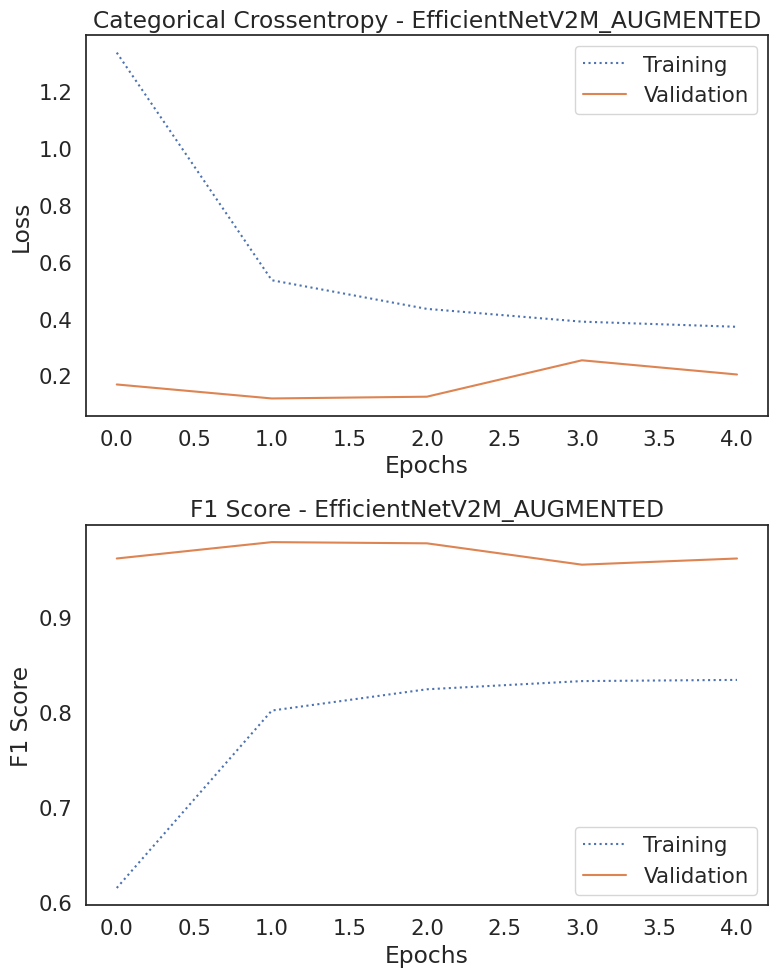

In [ ]:
# Plot loss fucntion and evaluation metric histories
plot_history_single(history_ft_efficientnetv2m, "EfficientNetV2M_AUGMENTED")

18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 719ms/step
Accuracy score over the test set: 0.975
Precision score over the test set: 0.9774
Recall score over the test set: 0.975
F1 score over the test set: 0.9753


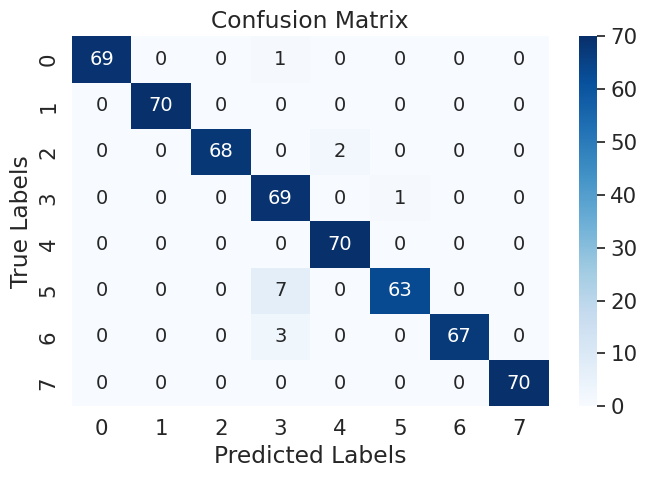

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_filename)
#Make predictions for model1 on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')
test_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')
test_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute confusion matrices for both models
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Optionally, you can delete the models to free up resources
del model

## Conservative 0.4 + 1e-5

THIS PART OF THE NOTEBOOK HAS NOT BEEN RUN!

In [ ]:
# HYPER-PARAMETERS FINE-TUNING
FINE_TUNE_EPOCHS = 5
UNFREEZE_RATIO = 0.4
FINE_TUNING_LEARNING_RATE = 1e-5

In [ ]:
# Load base to fine-tune
model = tfk.models.load_model('V2M_DENSE_BASE.keras')

# Print the model summary
model.summary(expand_nested=True)

In [ ]:
# Unfreeze
model = unfreeze(model, fine_tuning_lr=FINE_TUNING_LEARNING_RATE, unfreeze_ratio=UNFREEZE_RATIO)

# Fine-tuning
history_ft_efficientnetv2m = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Fine-tuning validation F1Score: {round(max(history_ft_efficientnetv2m['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = f'V2M_DENSE_{UNFREEZE_RATIO}_{FINE_TUNE_EPOCHS}_{FINE_TUNING_LEARNING_RATE}.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

In [ ]:
# Plot loss fucntion and evaluation metric histories
plot_history_single(history_ft_efficientnetv2m, "EfficientNetV2M_AUGMENTED")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_filename)
#Make predictions for model1 on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')
test_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')
test_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute confusion matrices for both models
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Optionally, you can delete the models to free up resources
del model

# Dense Layer Search

In [ ]:
# Parameters
INPUT_SHAPE = X_train.shape[1:]
OUTPUT_SHAPE = y_train.shape[1]
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
EPOCHS = 30
FINE_TUNE_EPOCHS = 5
UNFREEZE_RATIO = 0.8
FINE_TUNING_LEARNING_RATE = 5e-4

# Early Stopping and Learning Rate Reduction callbacks focusing on AUC for unbalanced datasets
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduction = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    min_lr=1e-6,
    factor=0.2,
    verbose=1
)

callbacks = [early_stopping, lr_reduction]

## 256 + 128

In [ ]:
from tensorflow.keras.applications import EfficientNetV2M

tf.keras.backend.clear_session()

# Define base model
base_model = EfficientNetV2M(
    weights='imagenet',
    include_top=False,
    input_shape=INPUT_SHAPE,
    pooling="avg",
    include_preprocessing=True
)

# Freeze the base model initially
base_model.trainable = False

# Define inputs
inputs = tfkl.Input(shape=INPUT_SHAPE)

# Pass through the base model
x = base_model(inputs)

# Add classifier head
x = tfkl.Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.2)(x)
x = tfkl.Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.2)(x)
outputs = tfkl.Dense(OUTPUT_SHAPE, activation='softmax')(x)

# Create the complete model
model = tfk.models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=[tfk.metrics.F1Score(average='macro')]
)

# Print the model summary
model.summary(expand_nested=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer (InputLayer)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling (Rescaling)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_conv (Conv2D)              │ (None, 48, 48, 24)          │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_bn (BatchNormalization)    │ (None, 48, 48, 24)          │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_activation (Activation)    │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_drop (Dropout)          │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_activation      │ (None, 48, 48, 24)          │              

 Total params: 53,513,788 (204.14 MB)

 Trainable params: 362,632 (1.38 MB)

 Non-trainable params: 53,151,156 (202.76 MB)

In [ ]:
# Transfer learning
history_tl = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Transfer learning validation F1Score: {round(max(history_tl['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = 'Dense_256_128_BASE.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 228s 822ms/step - f1_score: 0.4766 - loss: 1.9266 - val_f1_score: 0.8742 - val_loss: 0.8272 - learning_rate: 0.0010
Epoch 2/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 188s 781ms/step - f1_score: 0.6291 - loss: 1.3746 - val_f1_score: 0.8917 - val_loss: 0.6212 - learning_rate: 0.0010
Epoch 3/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 188s 778ms/step - f1_score: 0.6482 - loss: 1.2383 - val_f1_score: 0.8984 - val_loss: 0.5314 - learning_rate: 0.0010
Epoch 4/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 189s 785ms/step - f1_score: 0.6563 - loss: 1.1425 - val_f1_score: 0.8777 - val_loss: 0.5343 - learning_rate: 0.0010
Epoch 5/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 188s 781ms/step - f1_score: 0.6612 - loss: 1.0838 - val_f1_score: 0.8909 - val_loss: 0.4620 - learning_rate: 0.0010
Epoch 6/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 189s 784ms/step - f1_score: 0.6651 - loss: 1.0475 - val_f1_score: 0.8702 - val_loss: 0.4697 - learning_rate: 0.0010
Epoch 7/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 188s 780ms/step - f1_sco

In [ ]:
# Load base to fine-tune
model = tfk.models.load_model('Dense_256_128_BASE.keras')

# Unfreeze
model = unfreeze(model, fine_tuning_lr=FINE_TUNING_LEARNING_RATE, unfreeze_ratio=UNFREEZE_RATIO)

# Fine-tuning
history_ft = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Fine-tuning validation F1Score: {round(max(history_ft['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = 'Dense_256_128.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

474/741 layers unfrozen.
Epoch 1/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 539s 2s/step - f1_score: 0.7233 - loss: 0.8561 - val_f1_score: 0.9512 - val_loss: 0.2274 - learning_rate: 5.0000e-04
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - f1_score: 0.8189 - loss: 0.4840 - val_f1_score: 0.9806 - val_loss: 0.1326 - learning_rate: 5.0000e-04
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - f1_score: 0.8362 - loss: 0.3933 - val_f1_score: 0.9744 - val_loss: 0.1184 - learning_rate: 5.0000e-04
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - f1_score: 0.8386 - loss: 0.3552 - val_f1_score: 0.9497 - val_loss: 0.1985 - learning_rate: 5.0000e-04
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - f1_score: 0.8421 - loss: 0.3275 - val_f1_score: 0.9574 - val_loss: 0.1643 - learning_rate: 5.0000e-04
Fine-tuning validation F1Score: 98.06%


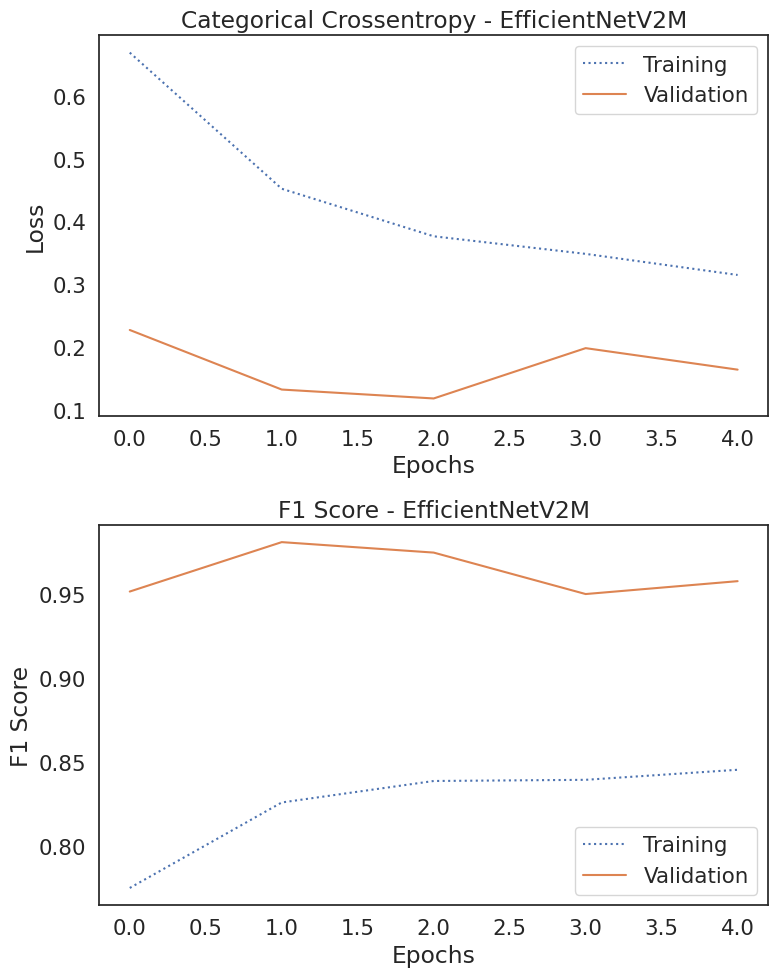

In [ ]:
# Plot loss fucntion and evaluation metric histories
plot_history_single(history_ft, "EfficientNetV2M")

18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 699ms/step
Accuracy score over the test set: 0.9875
Precision score over the test set: 0.9878
Recall score over the test set: 0.9875
F1 score over the test set: 0.9875


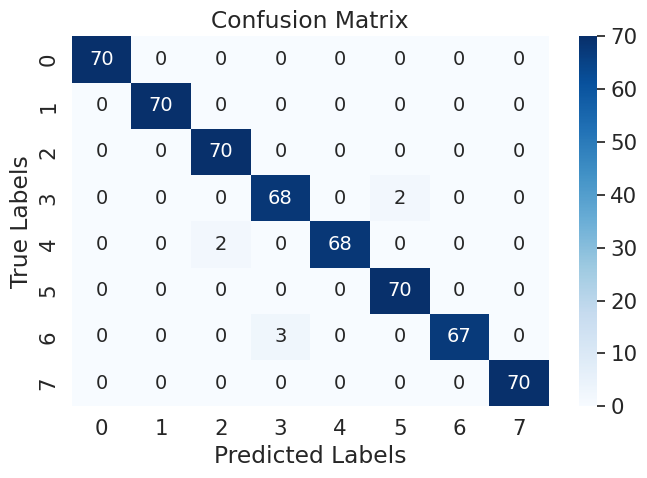

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_filename)
#Make predictions for model1 on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')
test_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')
test_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute confusion matrices for both models
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Optionally, you can delete the models to free up resources
del model

No luck with this one. Probably due to overfitting. Too aggressive of an unfreezing.

## 512

In [ ]:
from tensorflow.keras.applications import EfficientNetV2M

tf.keras.backend.clear_session()

# Define base model
base_model = EfficientNetV2M(
    weights='imagenet',
    include_top=False,
    input_shape=INPUT_SHAPE,
    pooling="avg",
    include_preprocessing=True
)

# Freeze the base model initially
base_model.trainable = False

# Define inputs
inputs = tfkl.Input(shape=INPUT_SHAPE)

# Pass through the base model
x = base_model(inputs)

# Add classifier head
x = tfkl.Dense(512, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = tfkl.Dropout(0.5)(x)
outputs = tfkl.Dense(OUTPUT_SHAPE, activation='softmax')(x)

# Create the complete model
model = tfk.models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=[tfk.metrics.F1Score(average='macro')]
)

# Print the model summary
model.summary(expand_nested=True)

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer (InputLayer)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling (Rescaling)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_conv (Conv2D)              │ (None, 48, 48, 24)          │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_bn (BatchNormalization)    │ (None, 48, 48, 24)          │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ stem_activation (Activation)    │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1a_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_project_activation      │ (None, 48, 48, 24)          │               0 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_drop (Dropout)          │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1b_add (Add)               │ (None, 48, 48, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_conv (Conv2D)   │ (None, 48, 48, 24)          │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_bn              │ (None, 48, 48, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ block1c_project_activation      │ (None, 48, 48, 24)          │              

 Total params: 53,810,364 (205.27 MB)

 Trainable params: 659,976 (2.52 MB)

 Non-trainable params: 53,150,388 (202.75 MB)

In [ ]:
# Transfer learning
history_tl = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Transfer learning validation F1Score: {round(max(history_tl['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = 'Dense_512_BASE.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 224s 812ms/step - f1_score: 0.4738 - loss: 1.9829 - val_f1_score: 0.8803 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 2/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 180s 748ms/step - f1_score: 0.6212 - loss: 1.2929 - val_f1_score: 0.8899 - val_loss: 0.5700 - learning_rate: 0.0010
Epoch 3/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 187s 774ms/step - f1_score: 0.6366 - loss: 1.1858 - val_f1_score: 0.9097 - val_loss: 0.4965 - learning_rate: 0.0010
Epoch 4/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 182s 753ms/step - f1_score: 0.6345 - loss: 1.1441 - val_f1_score: 0.9117 - val_loss: 0.4696 - learning_rate: 0.0010
Epoch 5/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 181s 753ms/step - f1_score: 0.6410 - loss: 1.1240 - val_f1_score: 0.9133 - val_loss: 0.4701 - learning_rate: 0.0010
Epoch 6/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 183s 760ms/step - f1_score: 0.6366 - loss: 1.1178 - val_f1_score: 0.9006 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 7/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 188s 781ms/step - f1_sco

In [ ]:
# Load base to fine-tune
model = tfk.models.load_model('Dense_512_BASE.keras')

# Unfreeze
model = unfreeze(model, fine_tuning_lr=FINE_TUNING_LEARNING_RATE, unfreeze_ratio=UNFREEZE_RATIO)

# Fine-tuning
history_ft = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks
).history

# Print score
print(f"Fine-tuning validation F1Score: {round(max(history_ft['val_f1_score'])* 100, 2)}%")

# Save the trained model to a file
model_filename = 'Dense_512.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

474/741 layers unfrozen.
Epoch 1/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 530s 2s/step - f1_score: 0.1110 - loss: 3.0753 - val_f1_score: 0.0414 - val_loss: 2.1670 - learning_rate: 5.0000e-04
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - f1_score: 0.0417 - loss: 2.1774 - val_f1_score: 0.0414 - val_loss: 2.1389 - learning_rate: 5.0000e-04
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - f1_score: 0.0418 - loss: 2.1528 - val_f1_score: 0.0414 - val_loss: 2.1174 - learning_rate: 5.0000e-04
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - f1_score: 0.0419 - loss: 2.1342 - val_f1_score: 0.0414 - val_loss: 2.1017 - learning_rate: 5.0000e-04
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - f1_score: 0.0418 - loss: 2.1205 - val_f1_score: 0.0414 - val_loss: 2.0904 - learning_rate: 5.0000e-04
Fine-tuning validation F1Score: 4.14%


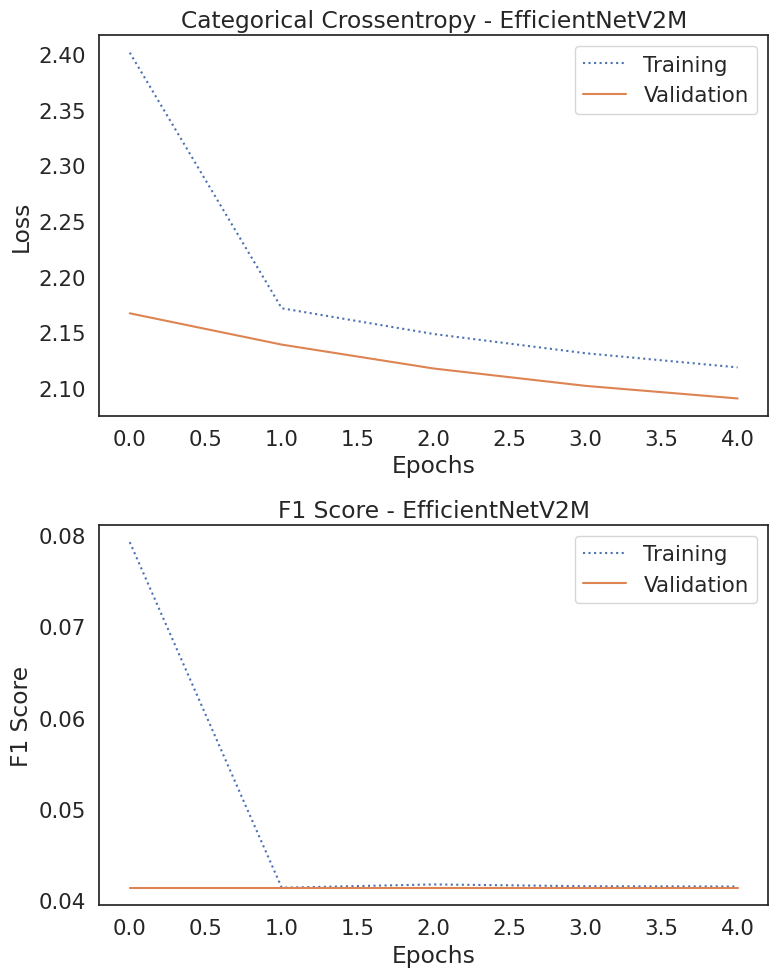

In [ ]:
# Plot loss fucntion and evaluation metric histories
plot_history_single(history_ft, "EfficientNetV2M")

18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 673ms/step
Accuracy score over the test set: 0.125
Precision score over the test set: 0.0156
Recall score over the test set: 0.125
F1 score over the test set: 0.0278


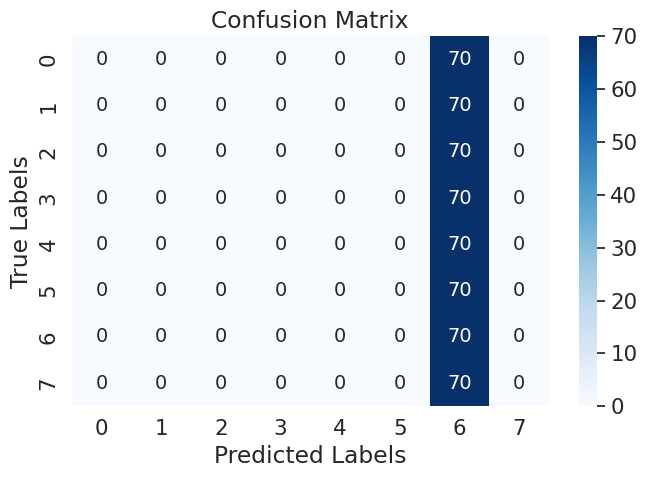

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_filename)
#Make predictions for model1 on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')
test_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')
test_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')
test_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute confusion matrices for both models
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Optionally, you can delete the models to free up resources
del model

Something strange happened here. No time to debug :(

# Final Model

The model employed for the final submission ended up being the V2M with a single 128 neuron dense layer and aggressive fine-tuning strategy.

In [ ]:
# Load base to fine-tune
model = tfk.models.load_model('V2M_DENSE_0.8_5_0.0005.keras')

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 1280)                │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,736,462 (586.46 MB)

 Trainable params: 50,210,536 (191.54 MB)

 Non-trainable params: 3,104,852 (11.84 MB)

 Optimizer params: 100,421,074 (383.08 MB)